### House prices

**Name:** Alexis Michell Hernandez Robledo

## Instalation of Libraries

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


     -------------------------------------- 294.9/294.9 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 10.7/10.7 MB 4.8 MB/s eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Load Dataset

In [4]:
# Load the CSV file
df = pd.read_csv('house_prices.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis (EDA)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



Estadísticas descriptivas:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



Columnas no numéricas: ['date']


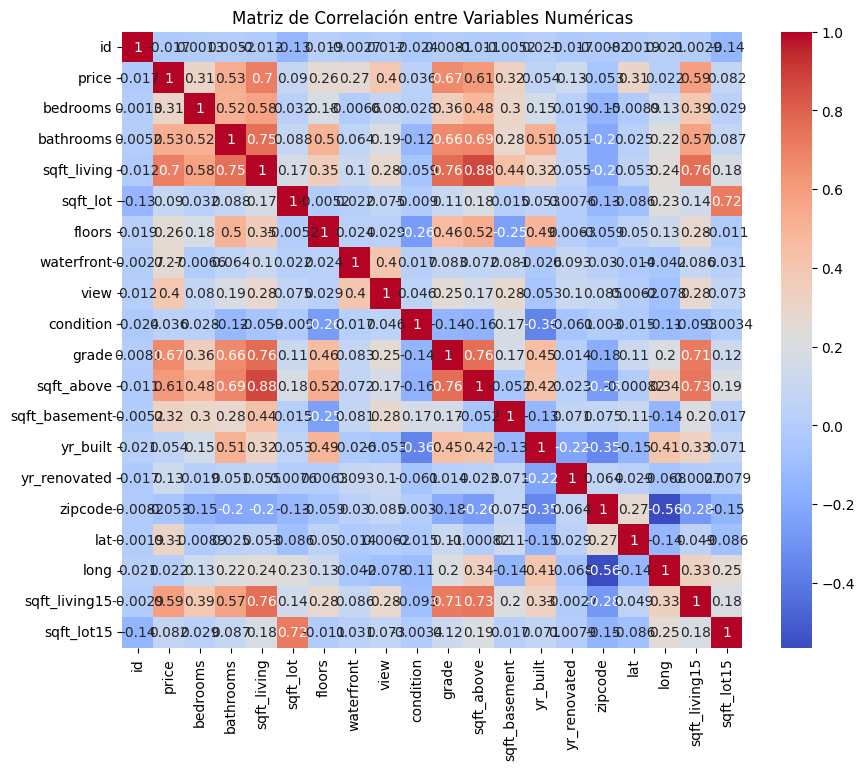

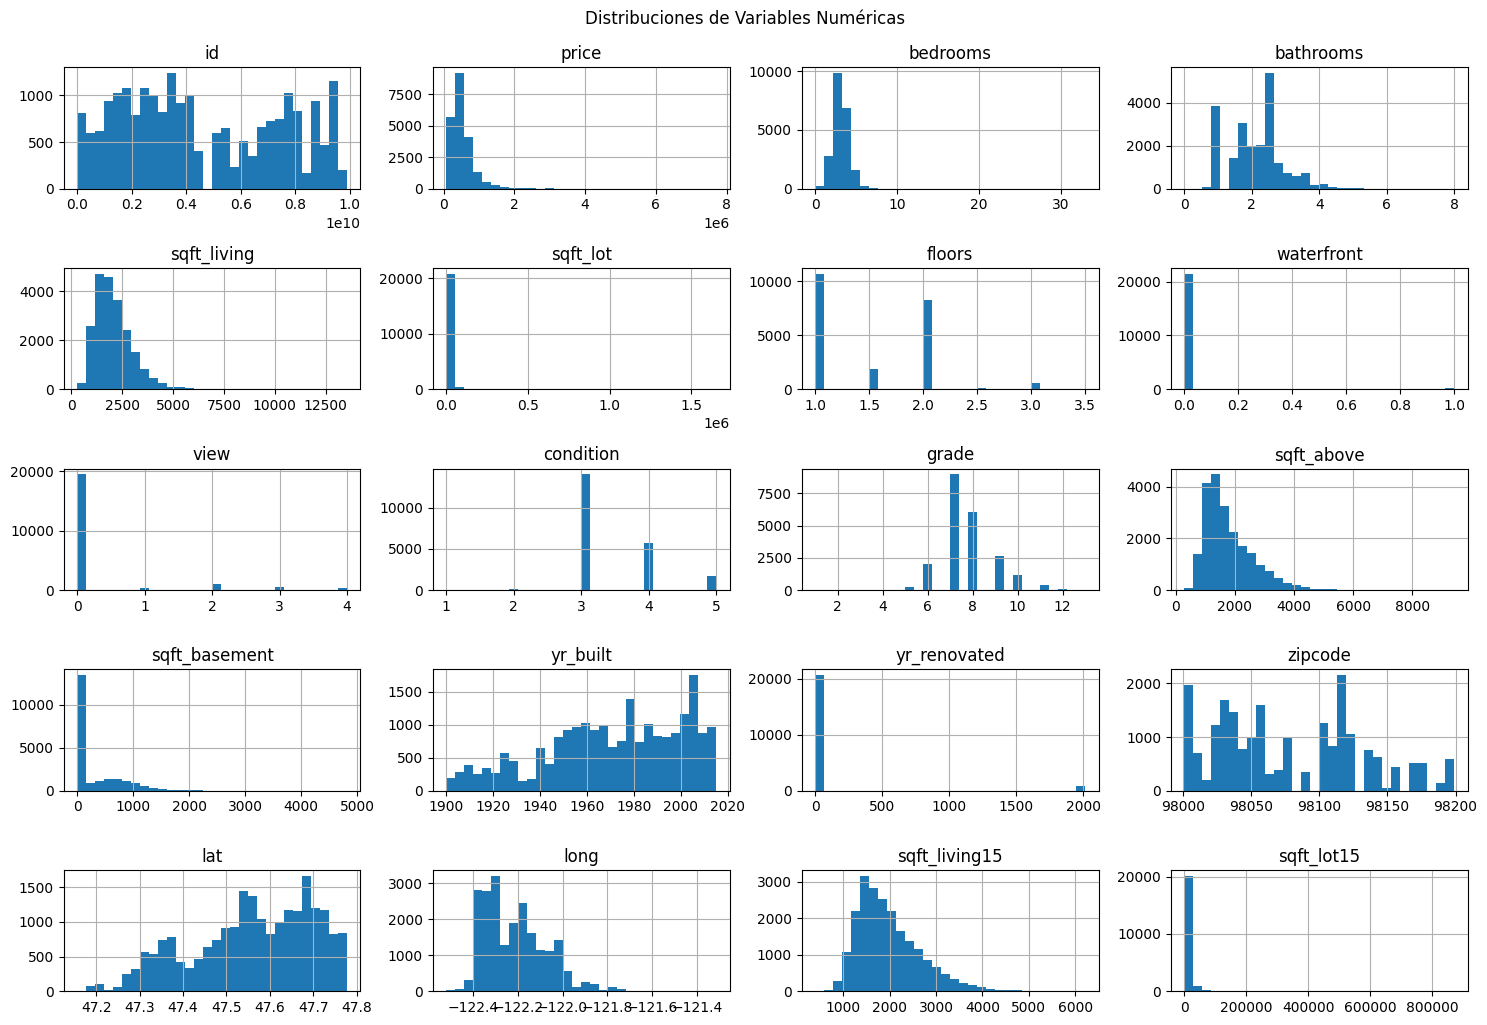

In [6]:
# Mostrar la estructura general del DataFrame
print("Información general del dataset:")
df.info()

# Verificar los primeros registros
print("\nPrimeras filas del dataset:")
display(df.head())

# Ver estadísticas generales de columnas numéricas
print("\nEstadísticas descriptivas:")
display(df.describe())

# Detectar columnas no numéricas
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("\nColumnas no numéricas:", list(non_numeric_cols))

# Si hay columnas de fecha, convertirlas si es necesario
# Por ejemplo, si hay una columna 'Date' con formato '20141013T000000':
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%dT%H%M%S', errors='coerce')

# Correlación solo entre variables numéricas
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# Gráfico de dispersión (ajusta 'SquareFeet' y 'Price' según tus columnas reales)
if 'SquareFeet' in df.columns and 'Price' in df.columns:
    sns.scatterplot(x='SquareFeet', y='Price', data=df)
    plt.title('Relación entre Tamaño (ft²) y Precio')
    plt.show()

# Histogramas de todas las variables numéricas
numeric_df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.suptitle("Distribuciones de Variables Numéricas", y=1.02)
plt.show()

## Data Cleaning and Preparation

In [7]:
# Check for missing values
df.isnull().sum()

# Example: Drop rows with missing values
df = df.dropna()

# Convert categorical variables if any
df = pd.get_dummies(df, drop_first=True)


## Feature Selection

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. Separar X (features) e y (objetivo)
y = df['price']  # Cambia esto si tu variable objetivo tiene otro nombre
X = df.drop(columns=['price'])

# 2. Eliminar columnas no numéricas que no se usarán (por ejemplo, 'id', 'address', 'zipcode', etc.)
columns_to_drop = ['id', 'zipcode', 'address', 'date']  # Puedes ajustar según tu dataset
X = X.drop(columns=[col for col in columns_to_drop if col in X.columns])

# 3. Eliminar columnas con varianza muy baja
selector = VarianceThreshold(threshold=0.01)  # Umbral configurable
X_var = selector.fit_transform(X)
selected_columns = X.columns[selector.get_support()]
X = pd.DataFrame(X_var, columns=selected_columns)

# 4. Eliminar una de cada par de columnas altamente correlacionadas
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
X = X.drop(columns=to_drop_corr)

# 5. Usar Random Forest para evaluar importancia de características
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Importancia de características
importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = importances[importances > 0.01].sort_values(ascending=False)

# 6. Filtrar solo las características importantes
X = X[important_features.index]

# 7. Mostrar las características seleccionadas
print("Características seleccionadas:")
print(important_features)


Características seleccionadas:
grade            0.308378
sqft_living      0.279960
lat              0.166638
long             0.075063
sqft_living15    0.034468
yr_built         0.027441
view             0.027308
sqft_above       0.023198
sqft_lot15       0.016439
sqft_lot         0.015934
dtype: float64


## Linear Regression Model

MSE: 50466855238.19
RMSE: 224648.29
R² score: 0.6662


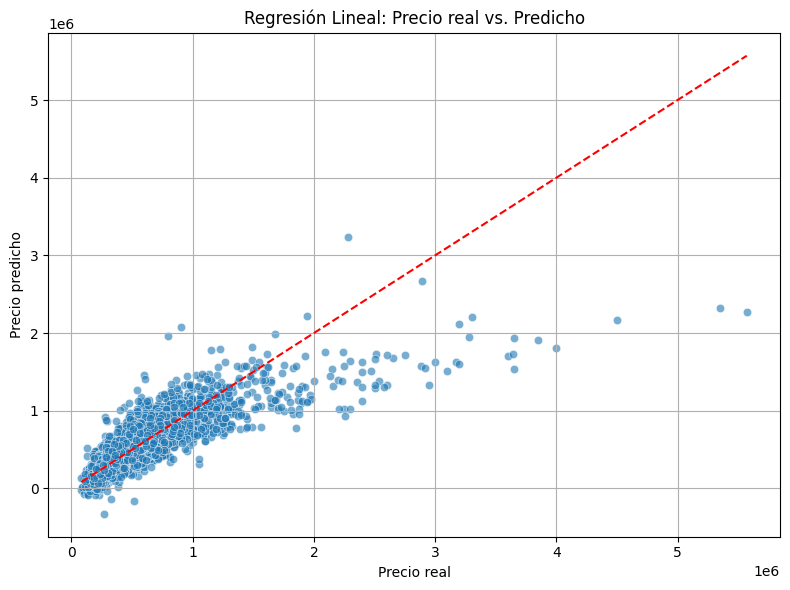

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Crear el modelo de regresión lineal
lr_model = LinearRegression()

# 3. Entrenar el modelo
lr_model.fit(X_train, y_train)

# 4. Predecir en el conjunto de prueba
y_pred = lr_model.predict(X_test)

# 5. Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.4f}")

# 6. Visualización: y_test vs y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Regresión Lineal: Precio real vs. Predicho')
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Evaluation

=== Evaluación del Modelo de Regresión Lineal ===
MAE (Error absoluto medio): 133672.78
MSE (Error cuadrático medio): 50466855238.19
RMSE (Raíz del error cuadrático medio): 224648.29
R² (Coeficiente de determinación): 0.6662


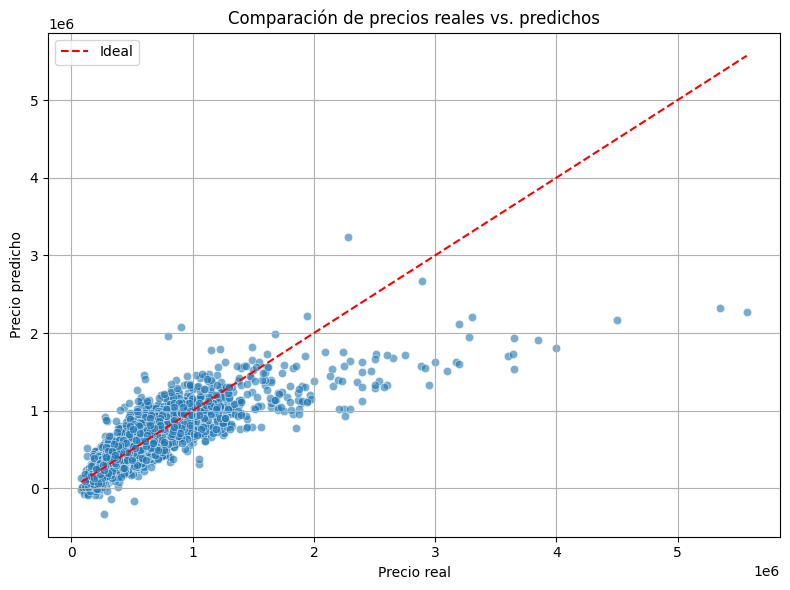

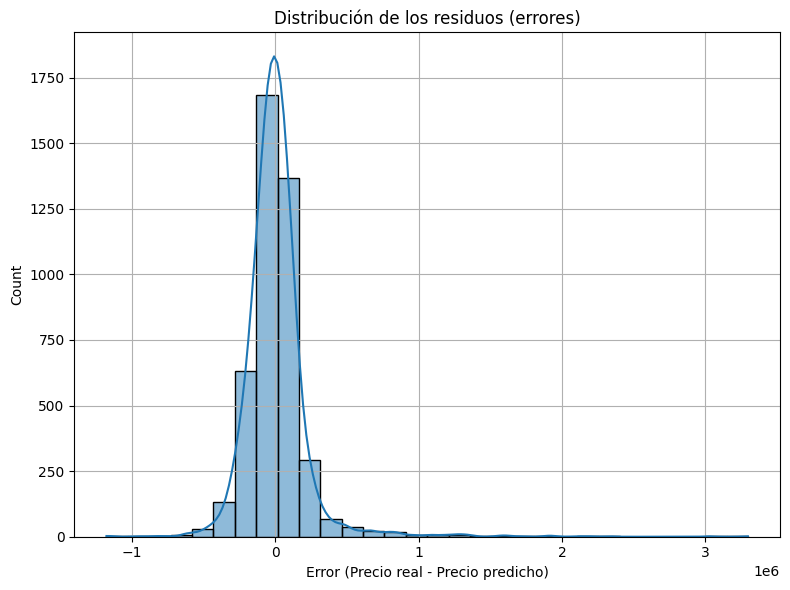

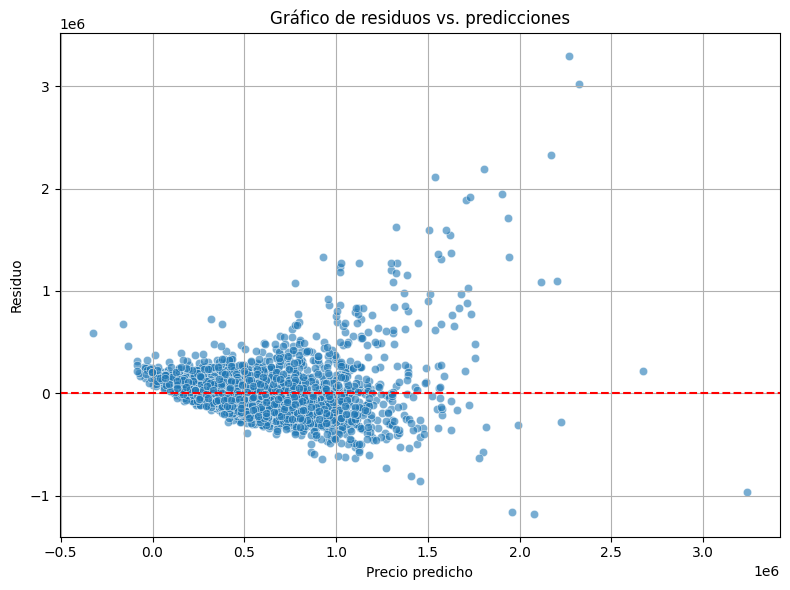

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ya tienes y_test y y_pred del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Evaluación del Modelo de Regresión Lineal ===")
print(f"MAE (Error absoluto medio): {mae:.2f}")
print(f"MSE (Error cuadrático medio): {mse:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.4f}")

#--------------------------------------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Comparación de precios reales vs. predichos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribución de los residuos (errores)")
plt.xlabel("Error (Precio real - Precio predicho)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Precio predicho")
plt.ylabel("Residuo")
plt.title("Gráfico de residuos vs. predicciones")
plt.grid(True)
plt.tight_layout()
plt.show()


## Prediction Plot

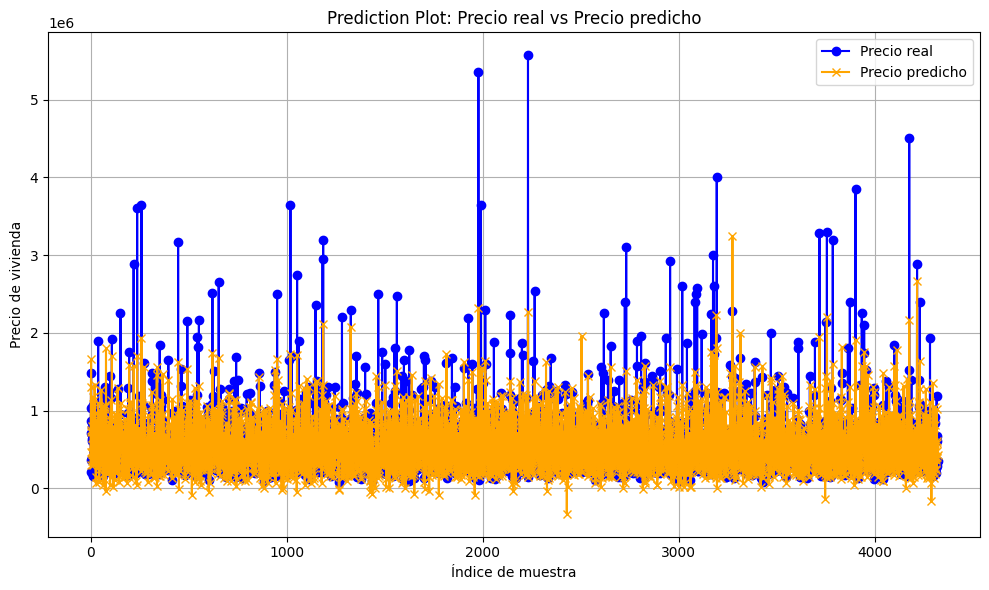

In [19]:
import matplotlib.pyplot as plt

# Ordenar por el índice original para mantener el orden temporal (si aplica)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Precio real", color='blue', marker='o')
plt.plot(y_pred, label="Precio predicho", color='orange', marker='x')
plt.title("Prediction Plot: Precio real vs Precio predicho")
plt.xlabel("Índice de muestra")
plt.ylabel("Precio de vivienda")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
